# week2-sessionn5 二次元配列と勾配問題

# 二次元配列と勾配問題

機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。  
この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

## 【問題1】1次関数  
$x$ が-50から50の範囲で次の式を考えます。  
$$y = \frac{1}{2}x + 1$$  

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

### 1.1.1 (解答)

In [1]:
import numpy as np
# np.set_printoptions(precision = 1)

x = np.arange(-50, 50, 0.1).reshape(-1, 1) #reshapeの引数に(-1,1)で縦のベクトルに、(1,-1)で横ベクトルに変化可能。
y = np.array((1/2)* x + 1).reshape(-1, 1)

print(f"yの値は、{type(y)}型で、10番目までの値は下記の通りです。\n {y[:10]}")

yの値は、<class 'numpy.ndarray'>型で、10番目までの値は下記の通りです。
 [[-24.  ]
 [-23.95]
 [-23.9 ]
 [-23.85]
 [-23.8 ]
 [-23.75]
 [-23.7 ]
 [-23.65]
 [-23.6 ]
 [-23.55]]


## 【問題2】配列の結合  
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

### 2.1.1(解答)

In [2]:
array_xy = np.concatenate([x, y], axis = 1) # axis=1 で横軸に結合。
print(array_xy[:10])

# concatemate(引数)は、第一引数に連結したいndarrayのリスト(タプルモ可)を指定。
# 第二引数(axis)で結合する軸（次元）を指定する。

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 [-49.7  -23.85]
 [-49.6  -23.8 ]
 [-49.5  -23.75]
 [-49.4  -23.7 ]
 [-49.3  -23.65]
 [-49.2  -23.6 ]
 [-49.1  -23.55]]


## 【問題3】勾配を求める  
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

$$y=\frac{yの変化量}{xの変化量}$$

### 3.1.1(解答)

In [3]:
amount_change = array_xy[1:] - array_xy[:-1]

gradent = amount_change[:, 1] / amount_change [:, 0] 
print(gradent)

# 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

### 3.1.2(確認用）


In [4]:
def gradient_math(x):
  dx = (x + 0.1) - (x)
  dy = ((1/2) * (x + 0.1) + 1) - ((1/2)* x + 1)
  dxy = dy / dx
  return dxy

print(gradient_math(-40))

0.5


## 【問題4】グラフを描く  
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

matplotlib.pyplot.plot — Matplotlib 3.1.0 documentation

### 4.1.1(解答)1次関数のグラフ

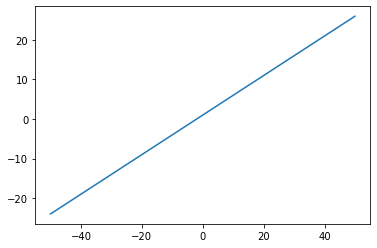

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.plot(array_xy[:, 0], array_xy[:, 1])

### 4.2.1(解答)横軸をｘ，縦軸を購買としたグラフ

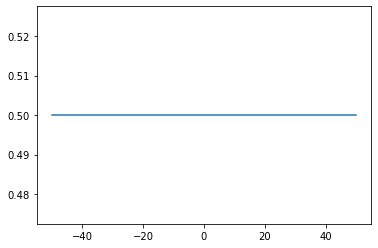

In [6]:
fig, ax = plt.subplots(1,1)

ax.plot(x[1:], gradent)

## 【問題5】Pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。  
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y = x^{2} \quad (-50\leq x \leq 50)\\
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$


また、問題4と同様にグラフを描いてください。  
ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

numpy.sin — NumPy v1.16 Manual

### 5.1.1(解答)問1から問3をまとめて関数化

In [7]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
  array_x = np.arange(*x_range).reshape(-1,1) # x_rangeをアンパックする + reshapeで縦ベクトルに変換。
  array_y = function(array_x).reshape(-1,1)
  # print(array_x.shape)
  # print(array_y.shape)
  # print(array_y)

  array_xy = np.concatenate([array_x, array_y], axis = 1)
  amount_change = array_xy[1:] - array_xy[:-1] 
  gradient = amount_change[:, 1] / amount_change [:, 0] 
  return array_xy, gradient

### 5.1.2(解答) $y=\frac{1}{2}\times x+1$の解

In [8]:
def function1(array_x): 
  array_y = ((1/2) * array_x) + 1
  return array_y

array_xy, gradient = compute_gradient(function1)
print(array_xy[:10])
print(gradient[:10])

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 [-49.7  -23.85]
 [-49.6  -23.8 ]
 [-49.5  -23.75]
 [-49.4  -23.7 ]
 [-49.3  -23.65]
 [-49.2  -23.6 ]
 [-49.1  -23.55]]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


### 5.2.2(解答) $y=x^2$の解

In [9]:
def function2(array_x): 
  array_y = array_x ** 2
  return array_y

array_xy, gradient = compute_gradient(function2)
print(array_xy[:10])
print(gradient[:10])

[[ -50.   2500.  ]
 [ -49.9  2490.01]
 [ -49.8  2480.04]
 [ -49.7  2470.09]
 [ -49.6  2460.16]
 [ -49.5  2450.25]
 [ -49.4  2440.36]
 [ -49.3  2430.49]
 [ -49.2  2420.64]
 [ -49.1  2410.81]]
[-99.9 -99.7 -99.5 -99.3 -99.1 -98.9 -98.7 -98.5 -98.3 -98.1]


### 5.2.2(解答) $y=x^2$のグラフ

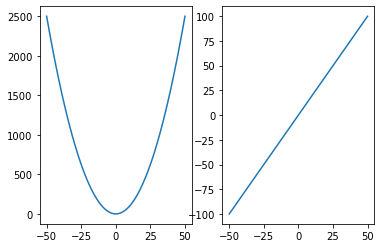

In [10]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.plot(array_xy[:,0], array_xy[:,1])

ax2 = fig.add_subplot(1,2,2)
ax2.plot(array_xy[:-1, 0], gradient)

### 5.3.1(解答) $y=2x^2+2^z$の解

In [11]:
def function3(array_x, z = 2): 
  array_y = 2 * (array_x ** 2) + (2 ** z)
  return array_y

array_xy, gradient = compute_gradient(function3)
print(array_xy[:10])
print(gradient[:10])

[[ -50.   5004.  ]
 [ -49.9  4984.02]
 [ -49.8  4964.08]
 [ -49.7  4944.18]
 [ -49.6  4924.32]
 [ -49.5  4904.5 ]
 [ -49.4  4884.72]
 [ -49.3  4864.98]
 [ -49.2  4845.28]
 [ -49.1  4825.62]]
[-199.8 -199.4 -199.  -198.6 -198.2 -197.8 -197.4 -197.  -196.6 -196.2]


### 5.3.2(解答) $y=2x^2+2^z$のグラフ

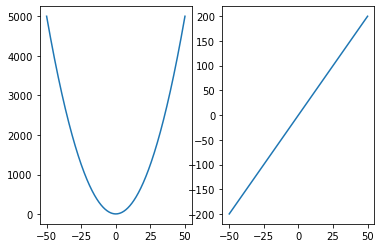

In [12]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.plot(array_xy[:,0], array_xy[:,1])

ax2 = fig.add_subplot(1,2,2)
ax2.plot(array_xy[:-1, 0], gradient)

### 5.4.1(解答) $y=sin(x^\frac{1}{2})$     $(0^<_=x^<_=50)$の解

In [21]:
def function4(array_x): 
  x = np.deg2rad(array_x ** (1/2))
  array_y = np.sin(x)
  return array_y

array_xy, gradient = compute_gradient(function4, x_range=(0, 50.1, 0.1))
print(array_xy[:10])
print(gradient[:10])

[[0.         0.        ]
 [0.1        0.00551919]
 [0.2        0.00780527]
 [0.3        0.00955942]
 [0.4        0.01103821]
 [0.5        0.01234103]
 [0.6        0.01351885]
 [0.7        0.01460195]
 [0.8        0.01561007]
 [0.9        0.01655689]]
[0.05519188 0.02286083 0.01754146 0.01478791 0.01302821 0.01177822
 0.01083103 0.01008112 0.00946825 0.00895516]


### 5.4.2(解答) $y=sin(x^\frac{1}{2})$     $(0^<_=x^<_=50)$のグラフ

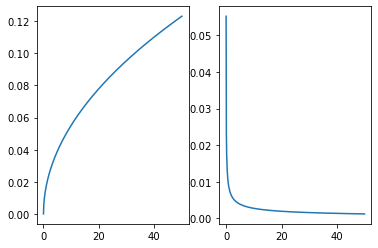

In [22]:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.plot(array_xy[:,0], array_xy[:,1])

ax2 = fig.add_subplot(1,2,2)
ax2.plot(array_xy[:-1, 0], gradient)

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。  
今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。

また、最小のyをとる前後の勾配を表示してください。


numpy.ndarray.min — NumPy v1.16 Manual  
numpy.ndarray.argmin — NumPy v1.16 Manual

### 6.1.1(解答) $y=\frac{1}{2}\times x+1$の最小値

In [15]:
array_xy, gradient = compute_gradient(function1)

print(f"x値の最小値は、{np.min(array_xy[:, 0])} です。")
print(f"y値の最小値は、{np.min(array_xy[:, 1])} です。")

print(f"x値の最小値のインデックスは、{np.argmin(array_xy[:, 0])} 番目です。")
print(f"y値の最小値のインデックスは、{np.argmin(array_xy[:, 1])} 番目です。")

x値の最小値は、-50.0 です。
y値の最小値は、-24.0 です。
x値の最小値のインデックスは、0 番目です。
y値の最小値のインデックスは、0 番目です。


### 6.2.1(解答) $y=x^2$の最小値

In [25]:
array_xy, gradient = compute_gradient(function2)
print(f"x値の最小値は、{np.min(array_xy[:, 0])} です。")
print(f"y値の最小値は、{np.min(array_xy[:, 1])} です。")

print(f"x値の最小値のインデックスは、{np.argmin(array_xy[:, 0])} 番目です。")
print(f"y値の最小値のインデックスは、{np.argmin(array_xy[:, 1])} 番目です。")

x値の最小値は、-50.0 です。
y値の最小値は、5.048709793414476e-25 です。
x値の最小値のインデックスは、0 番目です。
y値の最小値のインデックスは、500 番目です。


### 6.3.1(解答) $y=2x^2+2^z$の最小値

In [24]:
array_xy, gradient = compute_gradient(function3)
print(f"x値の最小値は、{np.min(array_xy[:, 0])} です。")
print(f"y値の最小値は、{np.min(array_xy[:, 1])} です。")

print(f"x値の最小値のインデックスは、{np.argmin(array_xy[:, 0])} 番目です。")
print(f"y値の最小値のインデックスは、{np.argmin(array_xy[:, 1])} 番目です。")

x値の最小値は、-50.0 です。
y値の最小値は、4.0 です。
x値の最小値のインデックスは、0 番目です。
y値の最小値のインデックスは、500 番目です。


### 6.4.1(解答) $y=sin(x^\frac{1}{2})$の最小値

In [23]:
array_xy, gradient = compute_gradient(function4, x_range=(0, 50.1, 0.1))
print(f"x値の最小値は、{np.min(array_xy[:, 0])} です。")
print(f"y値の最小値は、{np.min(array_xy[:, 1])} です。")

print(f"x値の最小値のインデックスは、{np.argmin(array_xy[:, 0])} 番目です。")
print(f"y値の最小値のインデックスは、{np.argmin(array_xy[:, 1])} 番目です。")

x値の最小値は、0.0 です。
y値の最小値は、0.0 です。
x値の最小値のインデックスは、0 番目です。
y値の最小値のインデックスは、0 番目です。
